# Find distribution of cel/pill variants

In [8]:
# Load processed data (necessary?)
import pandas as pd

path = '../../data/incels/processed_comments.pkl'
data = pd.read_pickle(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6248230 entries, 0 to 6248229
Data columns (total 11 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   type                              object        
 1   forum                             object        
 2   thread                            object        
 3   username                          object        
 4   date                              object        
 5   content                           object        
 6   parsed_date                       datetime64[ns]
 7   content_orig                      object        
 8   netmapper_identity_matches        object        
 9   netmapper_identity_matches_spans  object        
 10  actions_attributes                object        
dtypes: datetime64[ns](1), object(10)
memory usage: 524.4+ MB


In [15]:
# Get all usernames
usernames = data.username.str.lower().unique().tolist()
len(usernames)

8467

In [1]:
# Load incels vocab and term counts from Gensim model
from gensim.models import Word2Vec

path = '../models/emb/incels.model'
model = Word2Vec.load(path)

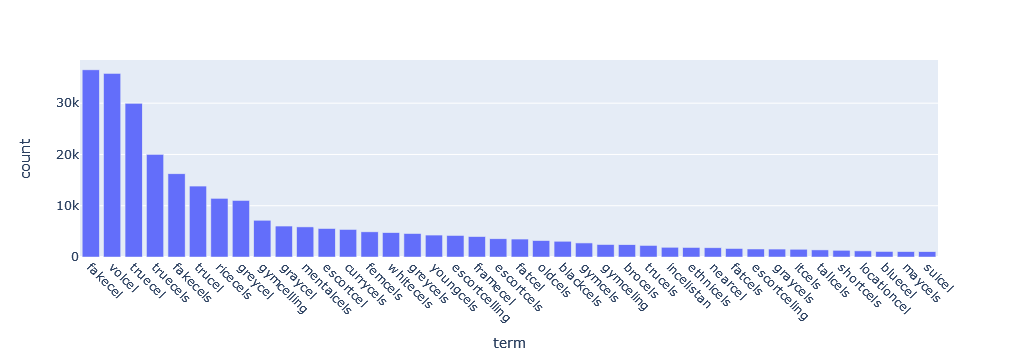

In [73]:
from collections import Counter
import pandas as pd

# usernames = ['animecel2d', '@animecel2d', '@aaaaaaaaaaacel', 'tehgymcel420', '@tehgymcel420', '@diocel', 'legendarywristcel', 'aaaaaaaaaaacel', 'itsover4cel',
#              '@ritalincel', 'gymletethnicel', 'incelinside', 'sillytruecel', '@cowcel', 'cowcel', 'gyros_pretcel', 'ethnicelnl', '@zettacel',
#             'zettacel', 'thebasedcel', '@thoughtfulcel', 'thoughtfulcel', 'thereaclchincel', 'turbocuckcel_7000', 'supersaiyangymcel', 'alt="cowcel"]https://incels.co',
#             '@sergeantincel', '@gymletethnicel', 'ppecel', '@ppecel', 'finncel', '@finncel', 'speedtypingincel', 'itsogrecel', 'dogcel256',
#             'idlevillagercel', 'framecel222', 'crestfallencel', 'templarcel421', '@eskimocel', 'eskimocel', 'cameroncel', '@incellectual', 
#              'braincelsrefugee', 'proudincelistani', 'gigacel123', 'blackopsiicel']
exclude = usernames + [f'@{name}' for name in usernames] + [
    'incels', 'incel', 'incels.is', 'incels.co', 'incels.me', 'inceldom', 'celibate', 'celebrate', 'celebrity', 'celebrities', 'inceltears', 'cells', 'excel', 'excels',
    'excellent', 'nicely', 'cel', 'cels', 'cell', 'alt="cowcel"]https://incels.co', 'celibate', 'celibates', 'eskimocel', '@eskimocel',
    'celebrating', 'aedracel', '@aedracel', 'deformaspergercel', '@deformaspergercel', 'celibacy', 'johnwickcel', '@johnwickcel', 'incelkingkong',
    '@incelkingkong', 'itsogrecel', '@itsogrecel', 'incelman', '@incelman', 'celtictruecel', 'celebrated', 'cancelled', 'hungarocel', '@hungarocel',
    'chesscel', '@chesscel', 'inceltear', 'higgscel', '@higgscel', 'genecel', '@genecel', 'powerlevelcel', '@powerlevelcel', '50iqcel', '@50iqcel',
    'hikicel', '@hikicel', 'manicel', '@manicel', 'braincels', 'boardwalkcel', '@boardwalkcel',
]
cel_variants = Counter({wd: model.wv.get_vecattr(wd, 'count') for wd in model.wv.key_to_index.keys() if 'cel' in wd and not wd in exclude})
cel_variants = pd.DataFrame(cel_variants.most_common(40), columns=['term', 'count'])
cel_variants

import plotly.express as px

fig = px.bar(cel_variants, x='term', y='count')
fig.update_xaxes(tickangle=45)

In [77]:
# Look into use of these terms
pd.set_option('display.max_colwidth', None)
# terms = ['fakecel', 'fakecels', 'fake cel', 'fake cels',] 
terms = ['truecel', 'truecels', 'true cel', 'true cels', 'trucel', 'trucels'] 

# data.loc[data.content.str.contains(r'|'.join([rf'\b{term}\b' for term in terms])), ['content', 'username']].sample(5)
data.loc[data.content.str.contains(r'|'.join([rf'\b{term}\b' for term in terms])), ['content', 'username']].sample(10)

,content,username
2780725,zaetheus said : view attachment 38414 this op nigga might be gay but you low iq bro . dekim said : from trucel to chad . amazing . just imagine how we might all be overrating foids since they all use make up even more heavily than this on a daily basis .,Henry de Montherlant
1271341,genetic dead end said : the only ascension for a truecel is roping,BrapZilian
1250750,"failmaxxed said : view attachment 273491 view attachment 273492 there is one city , and only foreigners live there damn nope not living there jfl , my half curry rice truecel freinds grandpa got robbed there so it 's basically mainland china jfl chinacurry said : nope , but if u are curry the chinese and malays will treat u worse than garbage . trust me singapore is the worst place on earth for curries , all u will do is cope with other curries , and their disgusting food , then marry a fat ugly curry ded srs ? malaysion chinese in australia were nice to me , and even my mum had chinese freinds , i never really liked malays tbhngl . and i see lots of half chinese half indians from malayasia so i thought it would nt be that bad lmao",Deleted member 23981
815758,"they basically neet , no social life , and also tfw no gf . so why are they not clasified as incels ? also why is there so few japcels when they basically the land of trucels ?",Senada
5049948,"cuyen said : gingers looks like truecels to me they have bad media effect and seen as "" creepy "" gingers have it worst tbh , even ethnics are better",Blacktarpill
340311,"ppecel said : if she was a male she 'd be truecel ; bad lower third , extremely small frame for a scandinavian person . she 's the only person that does n't framemog me",Hyperwristcel
2279921,"notquitechadlite said : only 2 types get 10 alerts , trucel spammers like ritalincel and sniffles or fakecels who only visit this site once in a while . blacktarpill said : hi , i m your alertfuel modus coperandi said : here have a free alert bro . edit : thanks for the alerts , fellow redditors ! !",MarriedAndLookin4Fun
1608094,transcended trucel said : does n't matter to me . i will be quitting normal life and become monk . it does n't mstter to anyone here ur not gon na get slid regarldess of whether gtprtgsmy goes up or down . it does matter . some people here are at the edge . people here are still trying(jfl ),Ropemaxx
4788614,"weeb25 said : no man he is truecel with mental problems do nt get mad at him its his place to vent here i like his posts a lot tbh , but what pisses me off is his constant bragging . the other day he has mentioned he could fuck that : but he refused . in another thread he said a cute girl asked him randomly for his phone number and texted with him , or that he rejected an ugly girl who was trying to hit it off with him . volcels.co tbh .",DoctorBlythe
5418948,"raiden said : i have nt watched in forever but i loved avgn / cinemassacre played a lot of snes / nes / genesis / gbc from elementary to high school and he kept making videos , perfect guy to watch all day i usually watch all his avgn episodes if i m bored i used to binge watch his videos a few months ago , but i eventually got bored of them . weirdcel said : truecel sense of humor i 'll take that as a compliment . normies have the worst sense of humor .",Kointo
